In [ ]:
import sys


import numpy as np
import pandas
import math



from sklearn.metrics import mean_squared_error,f1_score, accuracy_score
from sklearn.metrics import roc_curve, auc
import copy
import os
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

import json,pickle

from skimage.color import gray2rgb, rgb2gray, label2rgb
from sklearn.metrics import confusion_matrix

In [ ]:
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pickle
with open('/content/drive/MyDrive/paper_data/ccr/morris_ccr_mu_star.pkl', 'rb') as handle:
      ccr_mu_star = pickle.load(handle)
with open('/content/drive/MyDrive/paper_data/ccr/morris_ccr_sigma.pkl', 'rb') as handle:
      ccr_sigma = pickle.load(handle)
with open('/content/drive/MyDrive/paper_data/morris_ccr_mu.pkl', 'rb') as handle:
      ccr_mu = pickle.load(handle)
with open('/content/drive/MyDrive/paper_data/ccr/ccr_sobol_s1.pkl', 'rb') as handle:
      ccr_sobol_s1 = pickle.load(handle)
with open('/content/drive/MyDrive/paper_data/ccr/ccr_sobol_st.pkl', 'rb') as handle:
      ccr_sobol_st = pickle.load(handle)
with open('/content/drive/MyDrive/paper_data/ccr/ccr_dgsm_vi_mnist.pkl', 'rb') as handle:
      ccr_dgsm_vi = pickle.load(handle)
with open('/content/drive/MyDrive/paper_data/ccr/ccr_dgsm_dg_mnist.pkl', 'rb') as handle:
      ccr_dgsm_dg = pickle.load(handle)
with open('/content/drive/MyDrive/paper_data/ccr/ccr_fast_s1.pkl', 'rb') as handle:
      ccr_fast_s1 = pickle.load(handle)
with open('/content/drive/MyDrive/paper_data/ccr/ccr_fast_st.pkl', 'rb') as handle:
      ccr_fast_st = pickle.load(handle)
with open('/content/drive/MyDrive/paper_data/rbd_s1.pkl', 'rb') as handle:
      ccr_rbd_s1 = pickle.load(handle)
with open('/content/drive/MyDrive/paper_data/ccr/ccr_delta_d.pkl', 'rb') as handle:
      ccr_delta_d = pickle.load(handle)
with open('/content/drive/MyDrive/paper_data/ccr/ccr_delta_s1.pkl', 'rb') as handle:
      ccr_delta_s1 = pickle.load(handle)

with open('/content/drive/MyDrive/paper_data/ccr/morris_ccr_mu_star_inv.pkl', 'rb') as handle:
      ccr_mu_star_inv = pickle.load(handle)
with open('/content/drive/MyDrive/paper_data/ccr/morris_ccr_sigma_inv.pkl', 'rb') as handle:
      ccr_sigma_inv = pickle.load(handle)
with open('/content/drive/MyDrive/paper_data/morris_ccr_mu_inv.pkl', 'rb') as handle:
      ccr_mu_inv = pickle.load(handle)
with open('/content/drive/MyDrive/paper_data/ccr/ccr_sobol_s1_inv.pkl', 'rb') as handle:
      ccr_sobol_s1_inv = pickle.load(handle)
with open('/content/drive/MyDrive/paper_data/ccr/ccr_sobol_st_inv.pkl', 'rb') as handle:
      ccr_sobol_st_inv = pickle.load(handle)

with open('/content/drive/MyDrive/paper_data/ccr/ccr_dgsm_vi_inv_mnist.pkl', 'rb') as handle:
      ccr_dgsm_vi_inv = pickle.load(handle)
with open('/content/drive/MyDrive/paper_data/ccr/ccr_dgsm_dg_inv_mnist.pkl', 'rb') as handle:
      ccr_dgsm_dg_inv = pickle.load(handle)
with open('/content/drive/MyDrive/paper_data/ccr/ccr_fast_s1_inv.pkl', 'rb') as handle:
      ccr_fast_s1_inv = pickle.load(handle)
with open('/content/drive/MyDrive/paper_data/ccr/ccr_fast_st_inv.pkl', 'rb') as handle:
      ccr_fast_st_inv = pickle.load(handle)
with open('/content/drive/MyDrive/paper_data/rbd_s1_inv.pkl', 'rb') as handle:
      ccr_rbd_s1_inv = pickle.load(handle)
with open('/content/drive/MyDrive/paper_data/ccr/ccr_delta_d_inv.pkl', 'rb') as handle:
      ccr_delta_d_inv = pickle.load(handle)
with open('/content/drive/MyDrive/paper_data/ccr/ccr_delta_s1_inv.pkl', 'rb') as handle:
      ccr_delta_s1_inv = pickle.load(handle)

In [ ]:
ccr_mu_percentage = [c*100 for c in ccr_mu]
get_percent = lambda x: (i*100 for i in x)
per_res = get_percent(ccr_mu)
print(per_res)


<generator object <lambda>.<locals>.<genexpr> at 0x78517b9df4c0>


In [ ]:
def get_percent(x):
    perc = [i*100 for i in x]
    return perc

<ipython-input-23-7c3ef0a97825>:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ob" (-> color='b'). The keyword argument will take precedence.
  plt.plot(imp_thresh, get_percent(ccr_mu), '-ob', color=cmap.to_rgba(6), label = 'morris-mu')
<ipython-input-23-7c3ef0a97825>:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(imp_thresh, get_percent(ccr_mu_star), '-ok', color=cmap.to_rgba(8), label = 'morris-mu-star')
<ipython-input-23-7c3ef0a97825>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-or" (-> color='r'). The keyword argument will take precedence.
  plt.plot(imp_thresh, get_percent(ccr_sigma), '-or', color=cmap.to_rgba(10), label = 'morris-sigma')
<ipython-input-23-7c3ef0a97825>:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the

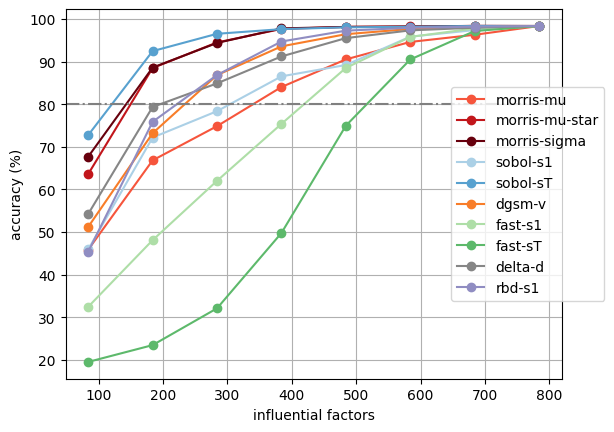

In [ ]:
# The impact of classification accuracy when utilizing groups of important pixels ordered in incremental order.
# The initial group consists of the top 84 most important pixels while final group comprises all pixel values of an image.
# this fig is better because the x-axis starts from 100.
imp_thresh = [84,184,284,384,484,584,684,784]
fig = plt.figure()
weights = np.arange(1, 11)
norm = mpl.colors.Normalize(vmin=min(weights), vmax=max(weights))
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.Reds)
plt.plot(imp_thresh, get_percent(ccr_mu), '-ob', color=cmap.to_rgba(6), label = 'morris-mu')
plt.plot(imp_thresh, get_percent(ccr_mu_star), '-ok', color=cmap.to_rgba(8), label = 'morris-mu-star')
plt.plot(imp_thresh, get_percent(ccr_sigma), '-or', color=cmap.to_rgba(10), label = 'morris-sigma')

cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.Blues)
plt.plot(imp_thresh, get_percent(ccr_sobol_s1), '-oy', color=cmap.to_rgba(4), label = 'sobol-s1')
plt.plot(imp_thresh, get_percent(ccr_sobol_st), '-og', color=cmap.to_rgba(6), label = 'sobol-sT')

cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.Oranges)
plt.plot(imp_thresh, get_percent(ccr_dgsm_vi), '-oc', color=cmap.to_rgba(6), label = 'dgsm-v')

cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.Greens)
plt.plot(imp_thresh, get_percent(ccr_fast_s1), marker='o', color=cmap.to_rgba(4),label = 'fast-s1')
plt.plot(imp_thresh, get_percent(ccr_fast_st),  marker='o', color=cmap.to_rgba(6),label = 'fast-sT')

cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.Greys)
plt.plot(imp_thresh, get_percent(ccr_delta_d),  marker='o', color=cmap.to_rgba(6), label = 'delta-d')

cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.Purples)

plt.plot(imp_thresh, get_percent(ccr_rbd_s1),  marker='o', color=cmap.to_rgba(6), label = 'rbd-s1')



plt.legend(bbox_to_anchor=(1.1,0.5) , loc='center right')
plt.xlabel('influential factors')
plt.ylabel('accuracy (%)')
plt.axhline(y = 80, color = 'gray', linestyle = '-.')
plt.grid(True)
plt.show()




<ipython-input-24-c71408bf0d1b>:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ob" (-> color='b'). The keyword argument will take precedence.
  plt.plot(imp_thresh, get_percent(ccr_mu_inv), '-ob', color=cmap.to_rgba(6), label = 'morris-mu')
<ipython-input-24-c71408bf0d1b>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(imp_thresh, get_percent(ccr_mu_star_inv), '-ok', color=cmap.to_rgba(8), label = 'morris-mu-star')
<ipython-input-24-c71408bf0d1b>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-or" (-> color='r'). The keyword argument will take precedence.
  plt.plot(imp_thresh, get_percent(ccr_sigma_inv), '-or', color=cmap.to_rgba(10), label = 'morris-sigma')
<ipython-input-24-c71408bf0d1b>:8: UserWarning: color is redundantly defined by the 'color' keyword argumen

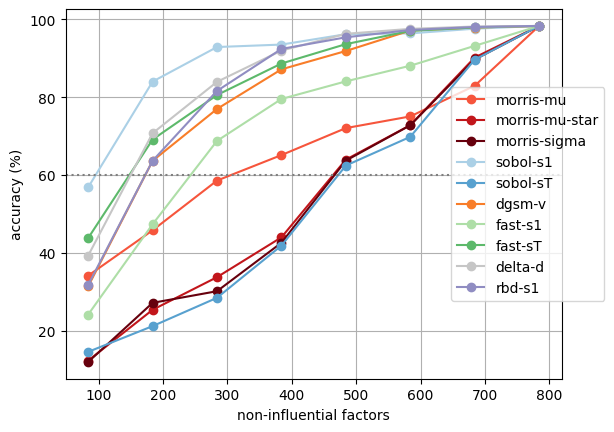

In [ ]:
fig = plt.figure()
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.Reds)
plt.plot(imp_thresh, get_percent(ccr_mu_inv), '-ob', color=cmap.to_rgba(6), label = 'morris-mu')
plt.plot(imp_thresh, get_percent(ccr_mu_star_inv), '-ok', color=cmap.to_rgba(8), label = 'morris-mu-star')
plt.plot(imp_thresh, get_percent(ccr_sigma_inv), '-or', color=cmap.to_rgba(10), label = 'morris-sigma')

cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.Blues)
plt.plot(imp_thresh, get_percent(ccr_sobol_s1_inv), '-oy', color=cmap.to_rgba(4), label = 'sobol-s1')
plt.plot(imp_thresh, get_percent(ccr_sobol_st_inv), '-oy', color=cmap.to_rgba(6), label = 'sobol-sT')

cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.Oranges)
plt.plot(imp_thresh, get_percent(ccr_dgsm_vi_inv), '-oc', color=cmap.to_rgba(6), label = 'dgsm-v')
# plt.plot(imp_thresh, get_percent(ccr_dgsm_dg_inv), color=cmap.to_rgba(6), marker='o', label = 'dgsm-dg')

cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.Greens)
plt.plot(imp_thresh, get_percent(ccr_fast_s1_inv), color=cmap.to_rgba(4), marker='o',label = 'fast-s1')
plt.plot(imp_thresh, get_percent(ccr_fast_st_inv), color=cmap.to_rgba(6), marker='o',  label = 'fast-sT')

cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.Greys)
plt.plot(imp_thresh, get_percent(ccr_delta_d_inv), color=cmap.to_rgba(4), marker='o', label = 'delta-d')
# plt.plot(imp_thresh, get_percent(ccr_delta_s1_inv), color=cmap.to_rgba(6), marker='o',  label = 'delta-s1')

cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.Purples)
plt.plot(imp_thresh, get_percent(ccr_rbd_s1_inv),  marker='o', color=cmap.to_rgba(6), label = 'rbd-s1')

plt.legend(bbox_to_anchor=(1.1,0.5) , loc='center right')
# plt.legend(loc='right')
plt.xlabel('non-influential factors')
plt.ylabel('accuracy (%)')
plt.axhline(y = 60, color = 'gray', linestyle = ':')

plt.grid(True)
plt.show()


In [ ]:
ccr_fast_st,ccr_fast_st_inv

([0.19519388643738597,
  0.2346215955554273,
  0.3209402501125989,
  0.4976971101791106,
  0.7493929519348188,
  0.9048310349095109,
  0.9715178208067415,
  0.9833274911194556],
 [0.4383118966703119,
  0.6914369789533664,
  0.8057615575143388,
  0.8867455901631105,
  0.9365428096908109,
  0.9705304054028676,
  0.9794398752699864,
  0.9833274911194556])

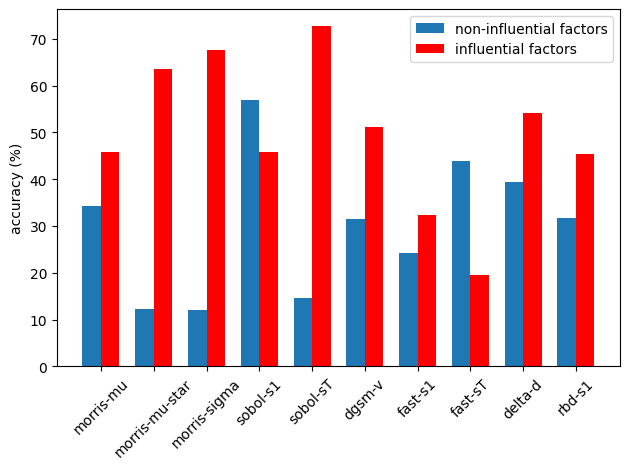

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


labels = ['morris-mu', 'morris-mu-star', 'morris-sigma', 'sobol-s1', 'sobol-sT' , 'dgsm-v', 'fast-s1' , 'fast-sT' , 'delta-d', 'rbd-s1']
men_means = [ccr_mu_inv[0]*100, ccr_mu_star_inv[0]*100, ccr_sigma_inv[0]*100, ccr_sobol_s1_inv[0]*100, ccr_sobol_st_inv[0]*100, ccr_dgsm_vi_inv[0]*100, ccr_fast_s1_inv[0]*100, ccr_fast_st_inv[0]*100, ccr_delta_d_inv[0]*100, ccr_rbd_s1_inv[0]*100]
women_means = [ccr_mu[0]*100, ccr_mu_star[0]*100, ccr_sigma[0]*100, ccr_sobol_s1[0]*100, ccr_sobol_st[0]*100, ccr_dgsm_vi[0]*100, ccr_fast_s1[0]*100, ccr_fast_st[0]*100, ccr_delta_d[0]*100, ccr_rbd_s1[0]*100]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='non-influential factors')
rects2 = ax.bar(x + width/2, women_means, width, color = 'r', label='influential factors')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('accuracy (%)')
# ax.set_title('Scores by group and gender')
degrees = 70
ax.set_xticks(x)
for tick in ax.get_xticklabels():
    tick.set_rotation(45)

ax.set_xticklabels(labels)
ax.legend()

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

file_name = '/content/drive/MyDrive/paper_data/ccr/mnist_SA_compare_ccr_inf_ninf_no_delta_s1.png'
fig.savefig(file_name,
            bbox_inches='tight',
            pad_inches=0.1,
            dpi=200,
            format='png')


In [ ]:
with open('/content/drive/MyDrive/paper_data/ccr/mnist_morris_index1.pkl', 'rb') as handle:
      morris_ind1 = pickle.load(handle)
with open('/content/drive/MyDrive/paper_data/ccr/mnist_morris_index2.pkl', 'rb') as handle:
      morris_ind2 = pickle.load(handle)
with open('/content/drive/MyDrive/paper_data/ccr/mnist_morris_index3.pkl', 'rb') as handle:
      morris_ind3 = pickle.load(handle)

with open('/content/drive/MyDrive/paper_data/ccr/mnist_sobol_index1.pkl', 'rb') as handle:
      sobol_ind1 = pickle.load(handle)
with open('/content/drive/MyDrive/paper_data/ccr/mnist_sobol_index2.pkl', 'rb') as handle:
      sobol_ind2 = pickle.load(handle)

with open('/content/drive/MyDrive/paper_data/ccr/mnist_fast_index1.pkl', 'rb') as handle:
      fast_ind1 = pickle.load(handle)
with open('/content/drive/MyDrive/paper_data/ccr/mnist_fast_index2.pkl', 'rb') as handle:
      fast_ind2 = pickle.load(handle)

with open('/content/drive/MyDrive/paper_data/ccr/mnist_rbd_index1.pkl', 'rb') as handle:
      rbd_ind1 = pickle.load(handle)

with open('/content/drive/MyDrive/paper_data/ccr/mnist_dgsm_index1.pkl', 'rb') as handle:
      dgsm_ind1 = pickle.load(handle)
with open('/content/drive/MyDrive/paper_data/ccr/mnist_dgsm_index2.pkl', 'rb') as handle:
      dgsm_ind2 = pickle.load(handle)

with open('/content/drive/MyDrive/paper_data/ccr/mnist_delta_index1.pkl', 'rb') as handle:
      delta_ind1 = pickle.load(handle)


In [ ]:
def visulaize(i,j,ind,titl):
    a = ax[i][j].imshow(ind)
    ax[i][j].set_title(titl,fontsize = 8)
    ax[i][j].axis('off')
    return a

In [ ]:
fig,ax = plt.subplots(6,3,figsize=(6,6))
visulaize(0,0,morris_ind1,"morris-mu-star")
visulaize(0,1,morris_ind2,"morris-sigma")
visulaize(0,2,morris_ind3,"morris-mu")

visulaize(1,0,sobol_ind1,"sobol-s1")
visulaize(1,1,sobol_ind2,"sobol-sT")
ax[1][2].set_visible(False)

visulaize(2,0,fast_ind1,"fast-s1")
visulaize(2,1,fast_ind2,"fast-sT")
ax[2][2].set_visible(False)

visulaize(3,0,rbd_ind1,"rbd-s1")
ax[3][1].set_visible(False)
ax[3][2].set_visible(False)

visulaize(4,0,dgsm_ind1,"dgsm-v")
# visulaize(1,1,sobol_ind2,"dgsm")
ax[4][1].set_visible(False)
ax[4][2].set_visible(False)

a = visulaize(5,0,delta_ind1,"delta")
ax[5][1].set_visible(False)
ax[5][2].set_visible(False)




cbar_ax = fig.add_axes([0.95, 0.1, 0.03, 0.8])
fig.colorbar(a, cax=cbar_ax)
fig.tight_layout()

file_name = '/content/drive/MyDrive/paper_data/ccr/mnist_all_indexes_sal'
fig.savefig(file_name,
            bbox_inches='tight',
            pad_inches=0.1,
            dpi=200,
            format='png')